# Result
1. knn_reg's accuracy score is 0.070 higher then LR score
2. DT_clf score's accuracy score is 0.18 higher then knn_clf

# Step 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

import warnings as w
w.filterwarnings('ignore')

# Regression

In [2]:
data=pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df=data.copy()
df1=data.copy()
df2=data.copy()

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(8555, 3)

In [6]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [7]:
x=df.drop('Weight',axis='columns')
y=df['Weight']

In [8]:
x,y

(      Gender     Height
 0       Male  73.847017
 1       Male  68.781904
 2       Male  74.110105
 3       Male  71.730978
 4       Male  69.881796
 ...      ...        ...
 8550  Female  60.483946
 8551  Female  63.423372
 8552  Female  65.584057
 8553  Female  67.429971
 8554  Female  60.921791
 
 [8555 rows x 2 columns],
 0       241.893563
 1       162.310473
 2       212.740856
 3       220.042470
 4       206.349801
            ...    
 8550    110.565497
 8551    129.921671
 8552    155.942671
 8553    151.678405
 8554    131.253738
 Name: Weight, Length: 8555, dtype: float64)

<AxesSubplot:ylabel='Count'>

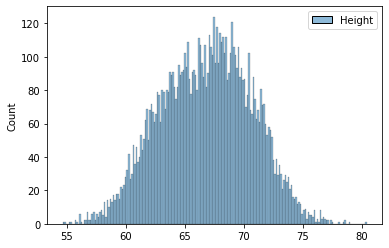

In [9]:
sns.histplot(x, bins=200)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

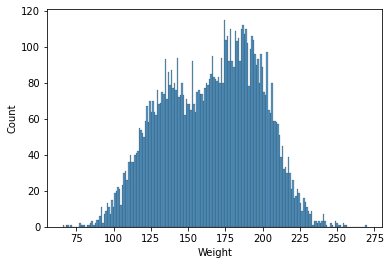

In [10]:
sns.histplot(y, bins=200)

<AxesSubplot:xlabel='Height'>

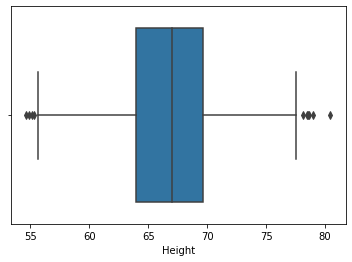

In [11]:
sns.boxplot(x.Height)

<AxesSubplot:xlabel='Weight'>

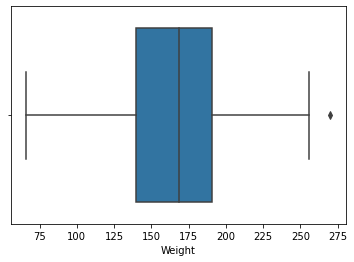

In [12]:
sns.boxplot(y)

# Outlier Removing

In [13]:
meanx=x.Height.mean()
meanx


66.80992512908925

In [14]:
stdx=x.Height.std()
stdx

3.8514544315772765

In [15]:
sorted_datax=sorted(x)
sorted_datay=sorted(y)

In [16]:
xq1,xq3=np.percentile(x['Height'],[25,75])
xq1,xq3

(63.95768391, 69.60442710999999)

In [17]:
xIQR=xq3-xq1
xIQR

5.646743199999989

In [18]:
left_fence_x=xq1-1.5*xIQR
right_fence_x=xq3+1.5*xIQR
left_fence_x,right_fence_x

(55.48756911000002, 78.07454190999997)

In [19]:
xi=x.Height
outlier=df[(xi<left_fence_x)&(xi>right_fence_x)]
outlier

,Gender,Height,Weight


In [20]:
no_outlier=df[(xi>left_fence_x)&(xi<right_fence_x)]


In [21]:
no_outlier.shape

(8545, 3)

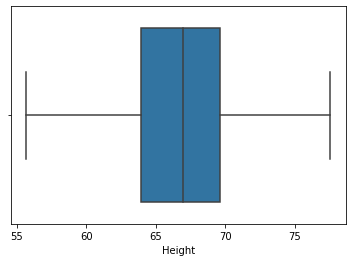

In [22]:
sns.boxplot(no_outlier.Height);

<AxesSubplot:xlabel='Height', ylabel='Count'>

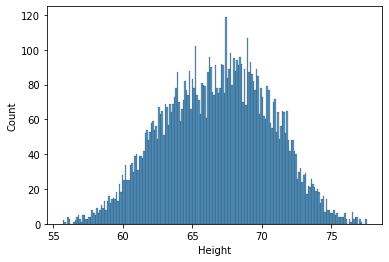

In [23]:
sns.histplot(no_outlier.Height, bins=200)

<AxesSubplot:xlabel='Weight'>

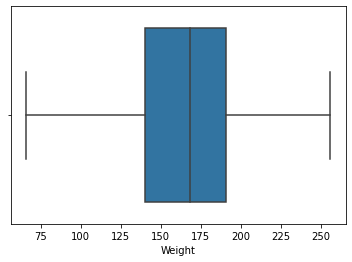

In [24]:
sns.boxplot(no_outlier.Weight)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

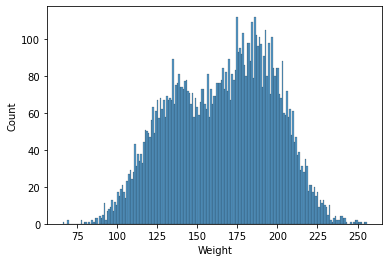

In [25]:
sns.histplot(no_outlier.Weight, bins=200)

In [26]:
df=no_outlier
x=no_outlier[['Height']]
y=no_outlier['Weight']

<AxesSubplot:xlabel='Height'>

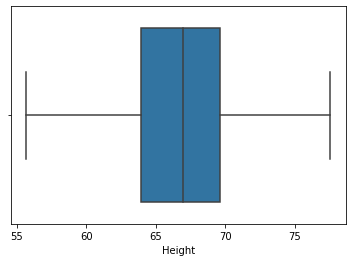

In [27]:
sns.boxplot(x.Height)

<AxesSubplot:xlabel='Weight'>

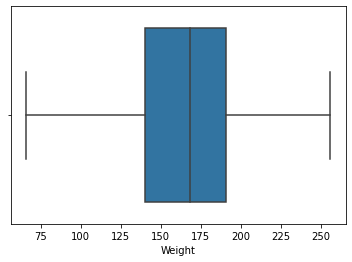

In [28]:
sns.boxplot(y)

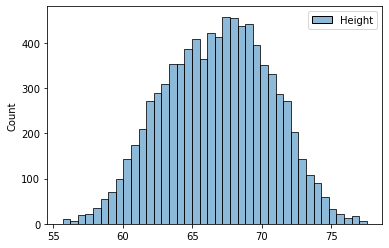

In [29]:
sns.histplot(x);

In [30]:
xtrain, xtest, ytrain, ytest =tts(x,y,test_size =.30)

In [31]:
xtrain.head()

,Height
525,68.624063
1409,68.167935
5953,68.122901
730,70.812000
927,68.874396


# Linear Regression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [34]:
m=lr.coef_
m

array([7.65367669])

In [35]:
c=lr.intercept_
c

-345.6392628713539

In [36]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [37]:
x1=71.730978
y=m*x1+c
y

array([203.36645171])

In [38]:
pred=lr.predict(x)

In [39]:
df['Predicted Weight'] = lr.predict(x)

In [40]:
df.head()

,Gender,Height,Weight,Predicted Weight
0,Male,73.847017,241.893563,219.561930
1,Male,68.781904,162.310473,180.795193
2,Male,74.110105,212.740856,221.575524
3,Male,71.730978,220.042470,203.366455
4,Male,69.881796,206.349801,189.213409


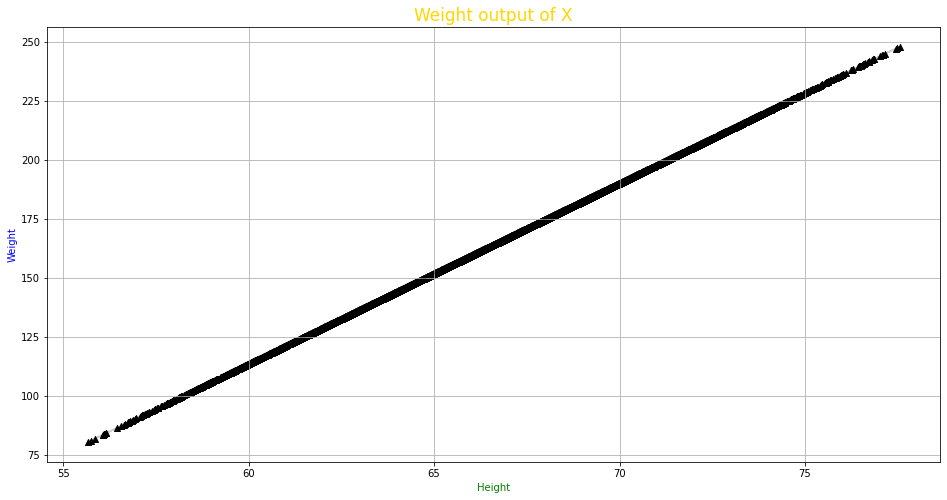

In [41]:
plt.figure(figsize=(16,8))
plt.scatter(x,pred,marker='^',color='Black')
plt.xlabel('Height',size=10,color='green')
plt.ylabel('Weight',size = 10,color='blue')
plt.title('Weight output of X',size=17,color='gold')
plt.grid()
plt.plot(x.squeeze(),pred ,color='black',alpha=.2)

In [42]:
pred1 = lr.predict(xtest)
pred1

array([183.15174666, 157.73170774, 215.04368645, ..., 185.6811257 ,
        99.46710413, 152.28283258])

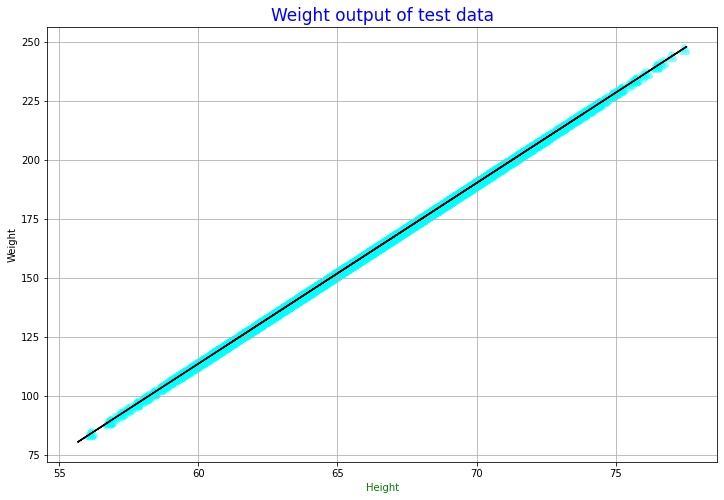

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(xtest,pred1,marker='^',color='cyan',linewidths=5,alpha=.5)
plt.xlabel('Height',size=10,color='green')
plt.ylabel('Weight',size = 10,color='black')
plt.title('Weight output of test data',size=17,color='Blue')
plt.grid()
plt.plot(x.squeeze(),pred ,color='black')


# MSE, MAE & R_2_score

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

Accuracy

In [45]:
mse = mean_squared_error(ytest, pred1)
mse

145.75044359841723

In [46]:
from sklearn.metrics import r2_score
lr_r2_score=r2_score(ytest, pred1)
lr_r2_score

0.8613611279619274

In [47]:
mae = mean_absolute_error(ytest, pred1)

In [48]:
mae

9.573398474499928

In [49]:
ytest.isnull().sum()

0

# KNN regressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
knr = KNeighborsRegressor(n_neighbors=2)

In [52]:
kn=knr.fit(xtest,ytest)

In [53]:
print(kn)

KNeighborsRegressor(n_neighbors=2)


In [54]:
knr.predict(xtest)    # prediction

array([193.81213635, 164.18664975, 211.7356619 , ..., 183.6064636 ,
        97.04086141, 162.2741312 ])

In [55]:
knn_r2_score=knr.score(xtest,ytest)
knn_r2_score                                 # accuracy score

0.9302634894972147

# Comparison between LR VS KNN_Reg

In [95]:
com_reg=knn_r2_score-lr_r2_score

In [96]:
com_reg

0.06890236153528728

# Step 2 : KNN Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

In [59]:
data1=pd.read_csv('breast-cancer.csv')
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
df3=data1.copy()
df4=data.copy()

In [61]:
df3.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [62]:
df3.shape

(569, 32)

In [63]:
df3.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [64]:
df3.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [65]:
#df3.plot(kind="box", subplots=True, layout=(6,8), figsize=(30,50));

In [66]:
x= df3.drop('diagnosis',axis='columns')
y=df3['diagnosis']

In [67]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [68]:
x.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [69]:
x.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [70]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=.30,random_state=1)

In [71]:
xtrain.shape

(398, 31)

In [72]:
x.shape

(569, 31)

In [73]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

KNeighborsClassifier()

In [74]:
knn_pred=knc.predict(xtest)
knn_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B'], dtype=object)

In [75]:
knn_score=knc.score(xtest,ytest)     
knn_score                          #Return the mean accuracy on the given test data and labels.

0.7660818713450293

# DT_CLF
1. Prediction
2. Classification report
3. Confusion matrix
4. Tree
5. ROC and AUC

In [76]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [77]:
clf=DecisionTreeClassifier()

In [78]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [79]:
clf_pred=clf.predict(xtest)

In [80]:
clf_pred

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

In [81]:
clf_report=classification_report(ytest,clf_pred)
clf_report

'              precision    recall  f1-score   support\n\n           B       0.95      0.97      0.96       108\n           M       0.95      0.90      0.93        63\n\n    accuracy                           0.95       171\n   macro avg       0.95      0.94      0.94       171\nweighted avg       0.95      0.95      0.95       171\n'

In [82]:
print(clf_report)

              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [83]:
cm=confusion_matrix(ytest,clf_pred)
cm

array([[105,   3],
       [  6,  57]], dtype=int64)

In [84]:
tp,fn,fp,tn=cm.reshape(-1)

Text(123.0, 0.5, 'actual_values')

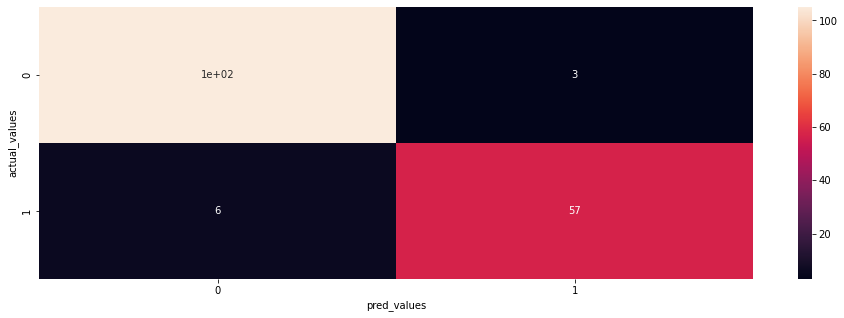

In [85]:
plt.figure(figsize=(16,5))
sns.heatmap(cm,annot=True)
plt.xlabel('pred_values')
plt.ylabel('actual_values')

[Text(0.4166666666666667, 0.9166666666666666, 'perimeter_worst <= 104.95\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.19047619047619047, 0.75, 'concave points_worst <= 0.135\ngini = 0.049\nsamples = 237\nvalue = [231, 6]'),
 Text(0.09523809523809523, 0.5833333333333334, 'area_se <= 48.975\ngini = 0.009\nsamples = 225\nvalue = [224, 1]'),
 Text(0.047619047619047616, 0.4166666666666667, 'gini = 0.0\nsamples = 222\nvalue = [222, 0]'),
 Text(0.14285714285714285, 0.4166666666666667, 'compactness_worst <= 0.085\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09523809523809523, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19047619047619047, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'texture_worst <= 26.9\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.23809523809523808, 0.4166666666666667, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'perimeter_se <= 1.61

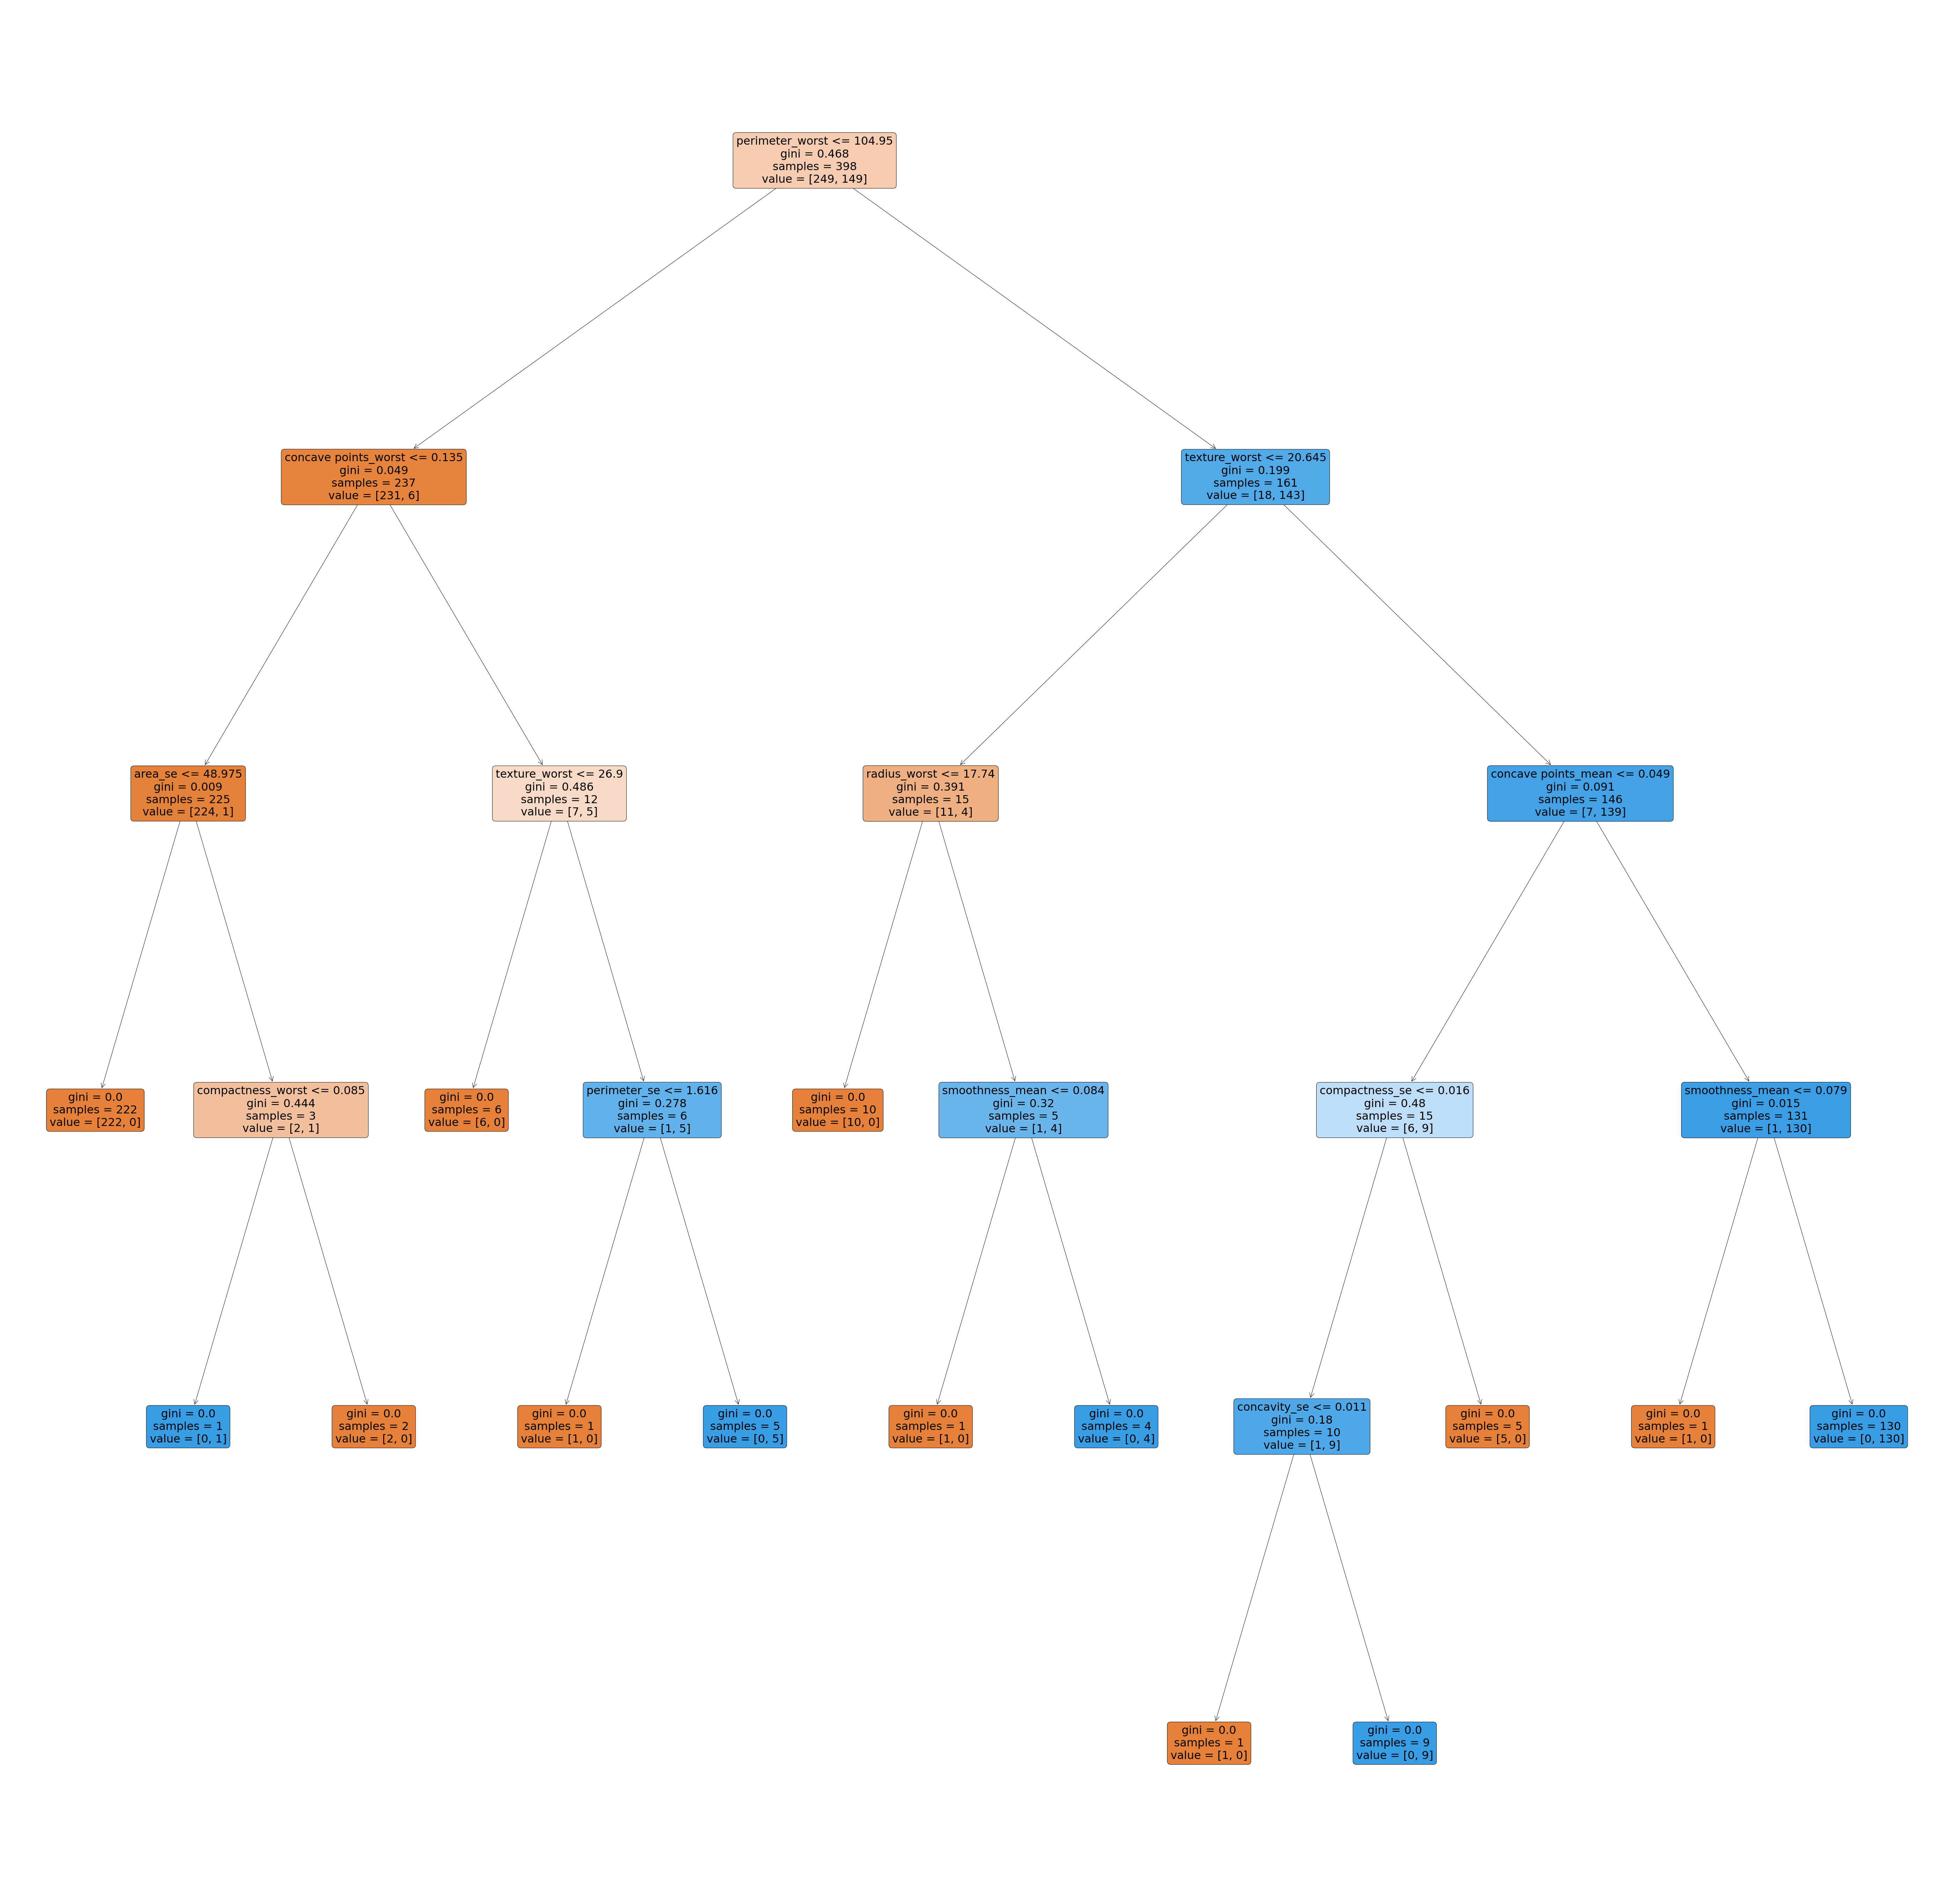

In [86]:
plt.figure(figsize=(100,100))
tree.plot_tree(clf,filled =True, rounded=True,feature_names=x.columns)

In [87]:
from sklearn.metrics import plot_roc_curve

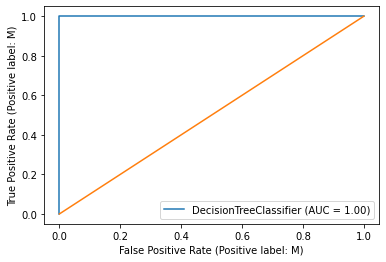

In [88]:
plot_roc_curve(clf,xtrain,ytrain)
plt.plot([0,1],[0,1])

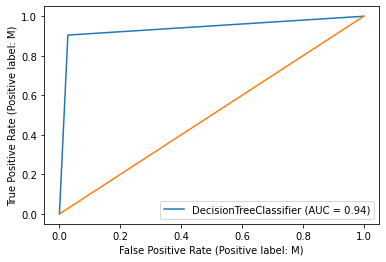

In [89]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])

In [90]:
accuracy_score(ytest, clf_pred)

0.9473684210526315

In [98]:
dt_clf_score=clf.score(xtest, ytest)
dt_clf_score

0.9473684210526315

# Comparison between Decision tree CLF VS KNN CLF

In [97]:
com_clf=dt_clf_score - knn_score
com_clf

0.18128654970760227

# Result
1. KNN_reg's accuracy score is 0.070 higher then LR score
2. DT_clf score's accuracy score is 0.18 higher then knn_clf

In [100]:
#End